In [3]:
import asyncio # 비동기처리를 위함
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS
from konlpy.utils import pprint
from konlpy.tag import Okt

In [2]:
# shadowDOM 인 경우 활용할 수 있음
# def expand_shadow_element(element):
#     shadow_root = driver.execute_script('return arguments[0].shadowRoot', element)
#     return shadow_root
# # arr에는 shadow DOM 각각의 상위 태그 및 selector 정보를 순서대로 넣기
# # target에는 최종적으로 찾고자하는 selector 넣기
# def find_element_in_shadowDOMs(arr, target):
#     curr_root = driver
#     root, shadow_root = None, None
#     for info in arr:
#         root = curr_root.find_element_by_css_selector(info)
#         shadow_root = expand_shadow_element(root)
#         curr_root = shadow_root
    
#     return curr_root.find_element_by_css_selector(target)
# # chrome://settings/content/javascript 페이지에서 사용할것.
# def toggleJavascriptAllow():
#     arr = ["settings-ui",
#        "#container > settings-main", 
#        "settings-basic-page", 
#        "#basicPage > settings-section.expanded > settings-privacy-page", 
#        "settings-subpage > category-default-setting", 
#        "settings-toggle-button"]
#     find_element_in_shadowDOMs(arr, "#outerRow > #control").click()

In [11]:
# naver blog에서 1~10 페이지까지의 블로그 url 크롤링
def getBlogsURL(driver, term):
    pageIndexes = range(1, 92, 10) # 1~10페이지
    blogs = []
    for pageIndex in pageIndexes:
        driver.get(F"https://search.naver.com/search.naver?where=post&query={term}&start={pageIndex}")
        dirtyURLs = driver.find_elements_by_class_name("sh_blog_top > dl > .txt_block > .inline > .url")
        for url in dirtyURLs:
            blogs.append( url.get_attribute("href") )
    return blogs
        

In [12]:
# 초, By.ID/By.Class등의 타입, 기준요소, 
# 기준요소가 로드될때까지 대기
def waiting(driver, sec, _type ,elem):
    try:
        element = WebDriverWait(driver, sec).until(
            EC.presence_of_element_located((_type, elem))
        )
    except:
        pass

In [13]:
chrome_options = Options()
chrome_options.add_argument("--window-size=1920,1080")

driver = webdriver.Chrome("./chromedriver", chrome_options=chrome_options)

<ipython-input-13-d2c94f73e9d5>:4: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome("./chromedriver", chrome_options=chrome_options)


In [14]:
blogsURLs = list(set(getBlogsURL(driver, "test")))

In [15]:
posts = []
for url in blogsURLs:
    try:
        driver.get(url)
        waiting(driver, 5, By.ID, "mainFrame")
        driver.switch_to_frame("mainFrame") # mainframe 내부의 #document로 이동
        post = driver.find_element_by_css_selector("#printPost1 > tbody > tr > td.bcc").text
        posts.append(post)
    except Exception as e: # 네이버 블로그가 아니면 에러.
        print("네이버 블로그가 아님", url)
        pass 

<ipython-input-15-11e1e39e0f20>:6: DeprecationWarning: use driver.switch_to.frame instead
  driver.switch_to_frame("mainFrame") # mainframe 내부의 #document로 이동


네이버 블로그가 아님
네이버 블로그가 아님
네이버 블로그가 아님
네이버 블로그가 아님
네이버 블로그가 아님
네이버 블로그가 아님
네이버 블로그가 아님
네이버 블로그가 아님
네이버 블로그가 아님
네이버 블로그가 아님
네이버 블로그가 아님
네이버 블로그가 아님
네이버 블로그가 아님
네이버 블로그가 아님
네이버 블로그가 아님


In [16]:

okt = Okt()

In [17]:
nouns = okt.nouns(" ".join(posts))

In [34]:
additional_words = [
    "블로그",
    "카페",
    "떄문",
    "대해",
    "댓글",
    "이웃",
    "위해",
    "메모"
    
]
stopwords = list(set(STOPWORDS))
stopwords.extend(additional_words)

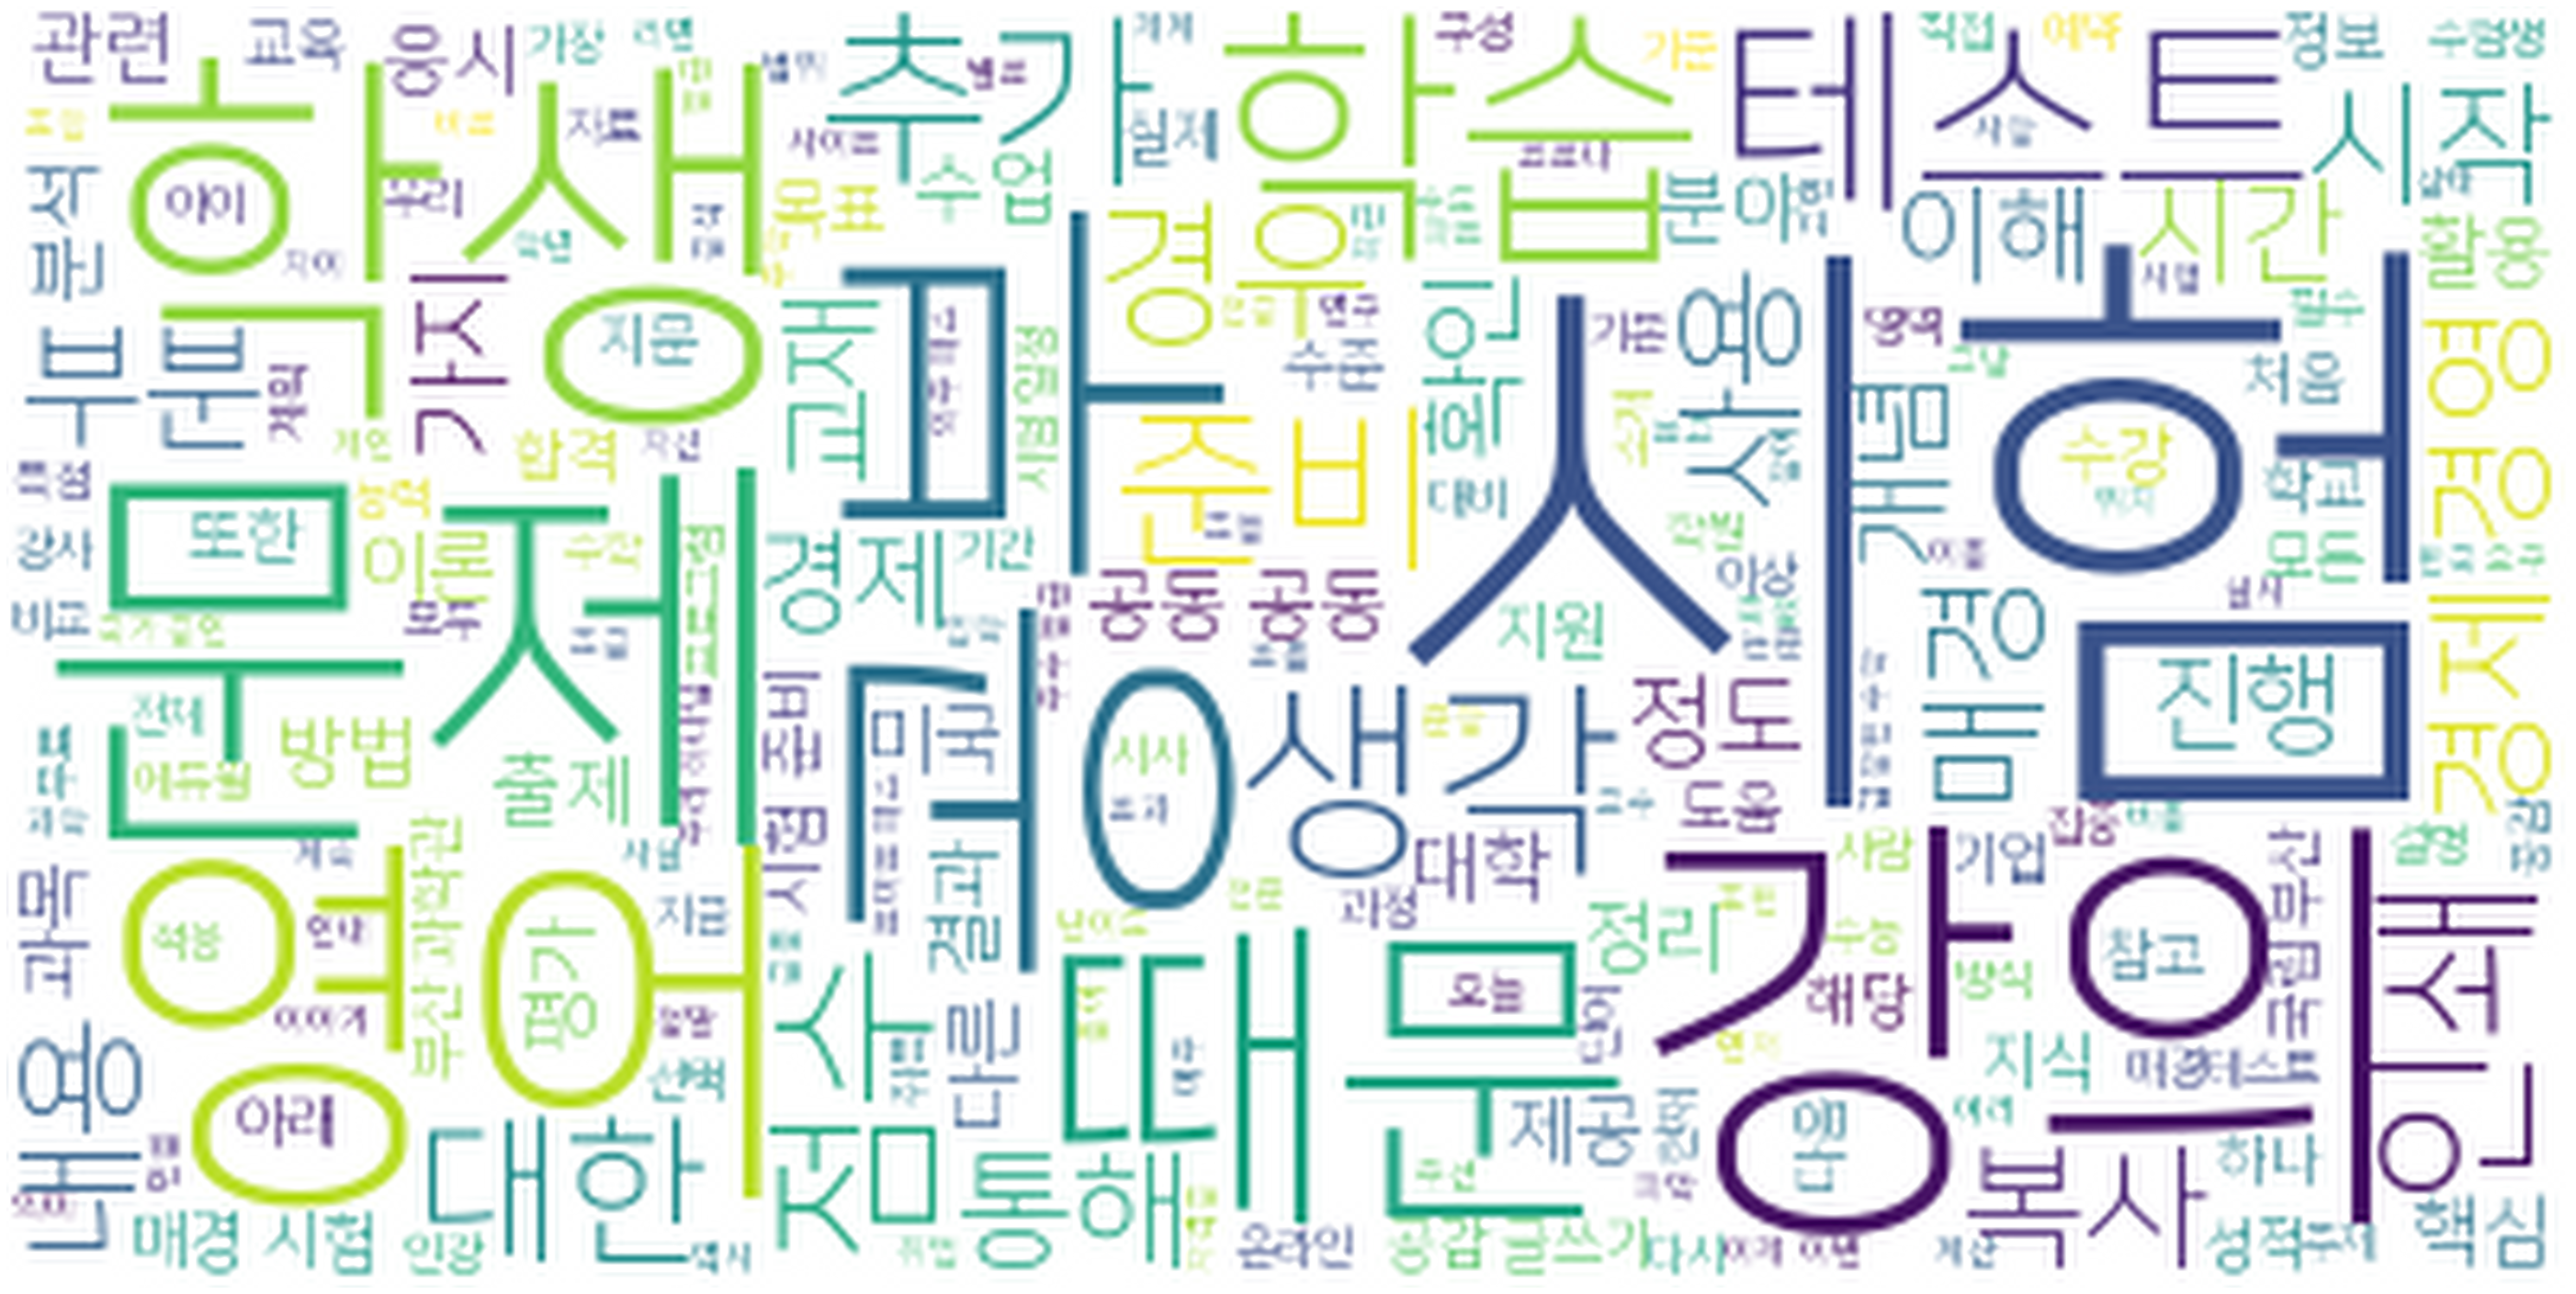

In [35]:
wordcloud = WordCloud(font_path="./NanumSquareL.ttf", 
                      background_color='white',
                        stopwords=stopwords
                     ).generate(" ".join(nouns))
plt.figure(figsize=(50,50)) #이미지 사이즈 지정
plt.imshow(wordcloud, interpolation='lanczos') #이미지의 부드럽기 정도
plt.axis('off') #x y 축 숫자 제거
plt.show() 
# plt.savefig()